<a href="https://colab.research.google.com/github/cvinnn/Data-Mining/blob/main/Cevin_0706022210035_W12_Responsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Library

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [3]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [4]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a dataset have no missing values. (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


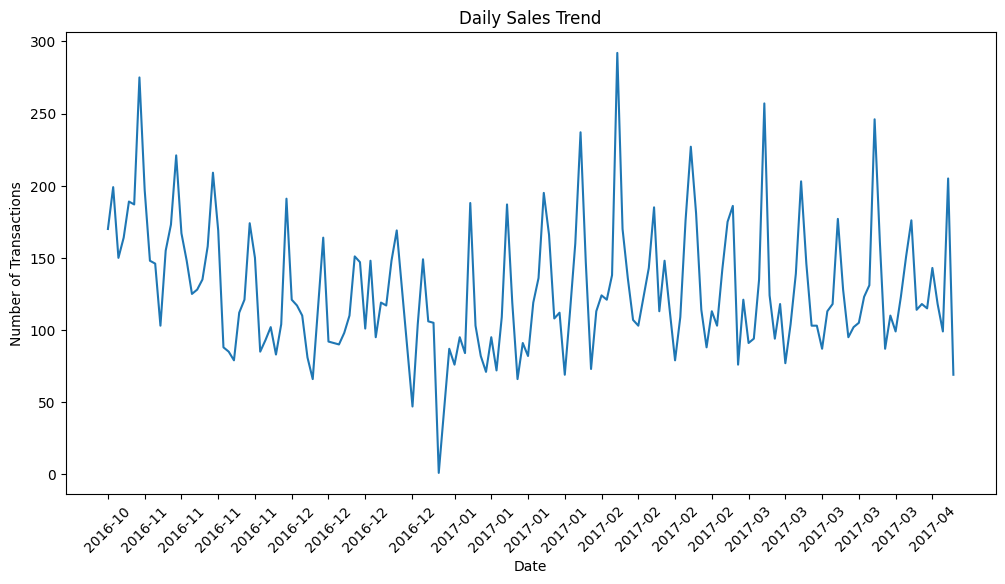

In [10]:
# 5
import pandas as pd
import matplotlib.pyplot as plt

# Extract date and hour from the date_time column
df['date'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month

# Group the data by date and count the number of transactions
daily_sales = df.groupby(df['date'].dt.date)['date_time'].count().reset_index(name='transactions')

# Sort the data by date
daily_sales = daily_sales.sort_values(by='date')

# Visualize the daily sales trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], daily_sales['transactions'])
plt.xticks(daily_sales['date'][::7], [d.strftime('%Y-%m') for d in daily_sales['date'][::7]], rotation=45)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [12]:
# 6
# Extract the required features
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['day_name'] = df['date_time'].dt.day_name()

# Define periods of the day
def get_period(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['period_day'] = df['hour'].apply(get_period)

# Classify as weekday or weekend
df['weekday_weekend'] = df['day_name'].apply(lambda x: 'weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'weekend')

# Display a sample of the modified dataframe
df.sample(5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,date,hour,weekday,month,time,day,year,day_name
19678,9300,Cookies,2017-04-03 12:03:00,afternoon,weekday,2017-04-03 12:03:00,12,Monday,4,12:03:00,3,2017,Monday
11151,5560,Coffee,2017-01-28 16:00:00,afternoon,weekend,2017-01-28 16:00:00,16,Saturday,1,16:00:00,28,2017,Saturday
317,151,Coke,2016-10-31 13:50:00,afternoon,weekday,2016-10-31 13:50:00,13,Monday,10,13:50:00,31,2016,Monday
10347,5172,Sandwich,2017-01-22 15:10:00,afternoon,weekend,2017-01-22 15:10:00,15,Sunday,1,15:10:00,22,2017,Sunday
5404,2678,Tea,2016-12-05 15:13:00,afternoon,weekday,2016-12-05 15:13:00,15,Monday,12,15:13:00,5,2016,Monday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


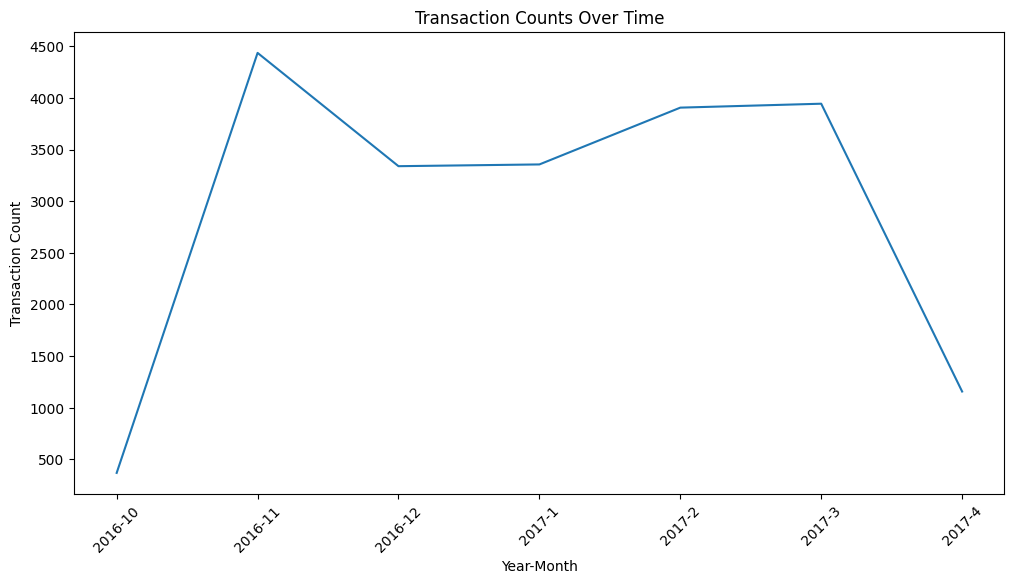

In [16]:
# 7
import matplotlib.pyplot as plt

# Group the data by year and month and count the transactions
monthly_sales = df.groupby(['year', 'month']).size().reset_index(name='transaction_count')

# Create a new column for Year-Month for better visualization
monthly_sales['year_month'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str)

# Sort by Year-Month
monthly_sales = monthly_sales.sort_values(by=['year', 'month'])

# Plot the monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['transaction_count'])
plt.title('Transaction Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()


8. Now, the visualization above provides better insights: it shows monthly peaks and drops, revealing trends like higher sales in November and lower activity in April.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [17]:
#9
# Get unique weekday names
unique_weekdays = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()

# Get unique weekend names
unique_weekends = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()

# Display the results
print("Unique weekday names:", unique_weekdays)
print("Unique weekend names:", unique_weekends)


Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [19]:
#10
# Aggregate total transactions by month and day_name
agg_transactions = df.groupby(['month', 'day_name']).size().unstack(fill_value=0)

# Reorder the columns to ensure the days of the week appear in the correct order
agg_transactions = agg_transactions[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Display the aggregated table
agg_transactions


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is that weekdays generally have higher transactions, with weekends showing lower activity, especially in months like April and October.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


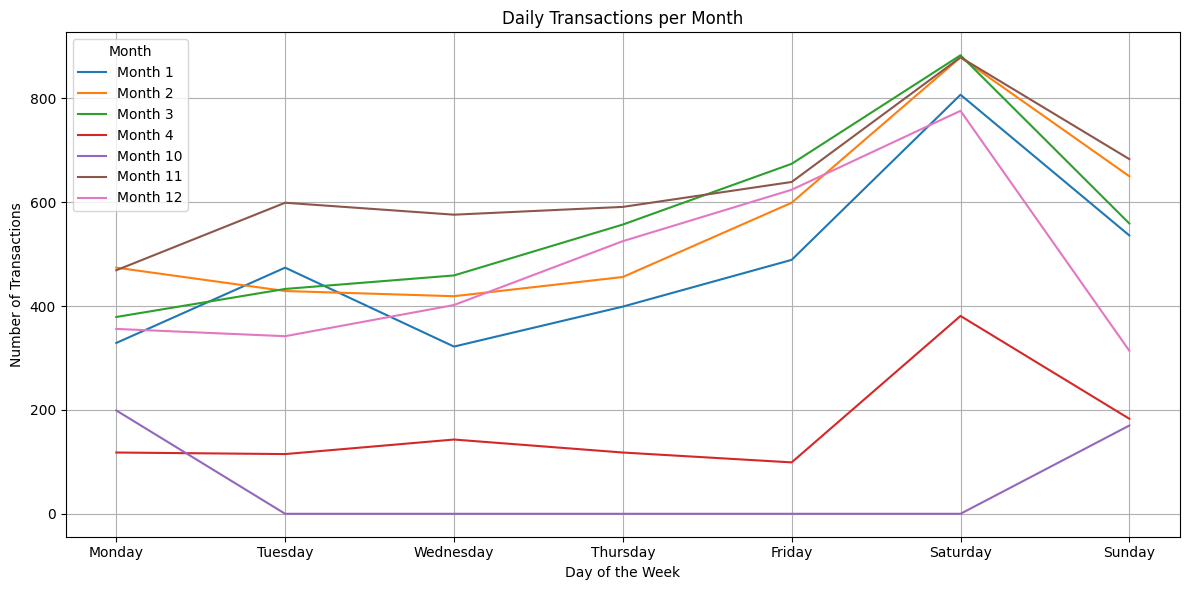

In [20]:
# 12
import matplotlib.pyplot as plt

# Assuming 'agg_transactions' contains the aggregated data from the previous steps

# Plotting the comparison of total sales per day for each month
plt.figure(figsize=(12, 6))

# Plot each month's total transactions by day of the week
for month in agg_transactions.index:
    plt.plot(agg_transactions.columns, agg_transactions.loc[month], label=f'Month {month}')

# Customize the plot
plt.title('Daily Transactions per Month')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.legend(title='Month', loc='upper left')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


13. Wow, after visualizing it like this, I can gain insights into the sales trends that show higher sales on weekdays, especially Friday, and lower sales on weekends, with monthly variations..

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [21]:
# 14
# Check the unique values in the 'period_day' column
unique_periods = df['period_day'].unique()
print(unique_periods)


['morning' 'afternoon' 'evening' 'night']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [22]:
# 15
# Group data by period and get the unique hours for each period
morning_hours = df[df['period_day'] == 'morning']['hour'].unique()
afternoon_hours = df[df['period_day'] == 'afternoon']['hour'].unique()
evening_hours = df[df['period_day'] == 'evening']['hour'].unique()
night_hours = df[df['period_day'] == 'night']['hour'].unique()

# Print the unique hours for each period
print(f"Unique morning_hour: {sorted(morning_hours)}")
print(f"Unique afternoon_hour: {sorted(afternoon_hours)}")
print(f"Unique evening_hour: {sorted(evening_hours)}")
print(f"Unique night_hour: {sorted(night_hours)}")


Unique morning_hour: [7, 8, 9, 10, 11]
Unique afternoon_hour: [12, 13, 14, 15, 16]
Unique evening_hour: [17, 18, 19, 20]
Unique night_hour: [1, 21, 22, 23]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Yes, the hour 1 in the "morning" period is odd because it typically belongs to the night. This might be due to incorrect labeling of early morning hours.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


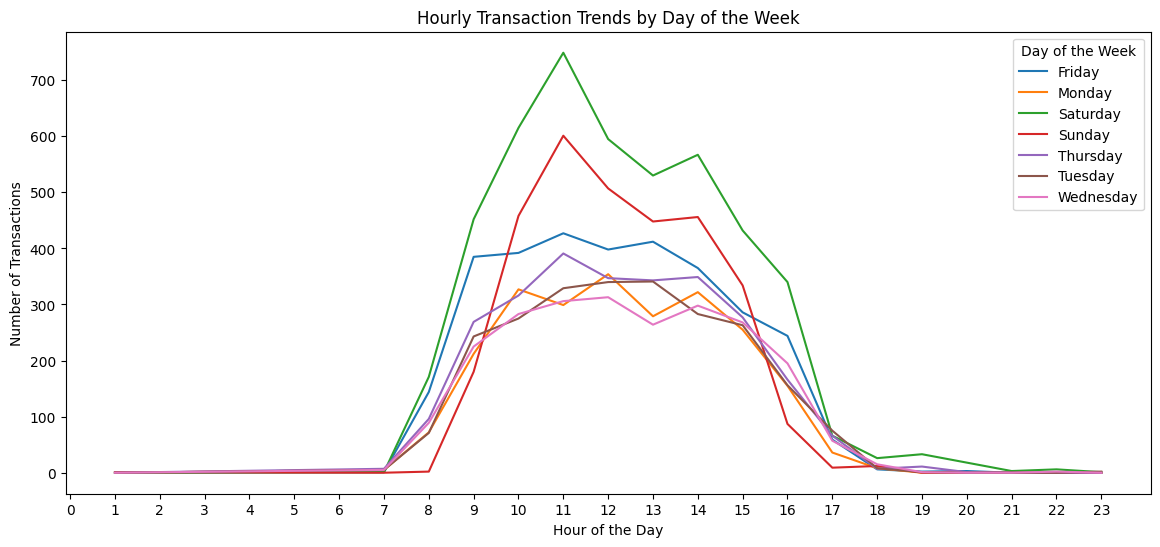

In [25]:
# 17
import matplotlib.pyplot as plt

# Aggregate transactions by hour and day_name
hourly_day_sales = df.groupby(['hour', 'day_name']).size().unstack(fill_value=0)

# Create a line chart to visualize sales trends by hour for each day of the week
plt.figure(figsize=(14, 6))
for day in hourly_day_sales.columns:
    plt.plot(hourly_day_sales.index, hourly_day_sales[day], label=day)

# Customize the plot
plt.title("Hourly Transaction Trends by Day of the Week")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # Ensure all hours are represented on the x-axis
plt.legend(title='Day of the Week')

# Show the plot
plt.show()

18. The daily sales trend plot reveals that transaction volumes vary by hour, with noticeable differences between weekdays and weekends.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


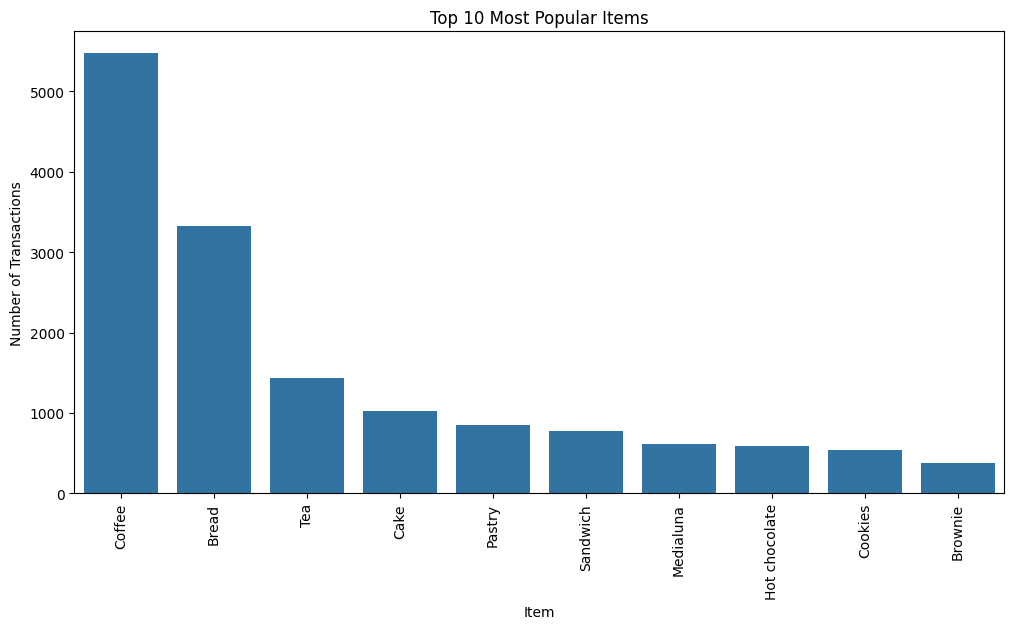

In [28]:
# 19
# Get the top 10 most frequent items
top_10_items = df['Item'].value_counts().head(10)

# Create a bar chart for the top 10 most popular items
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_items.index, y=top_10_items.values)
plt.title("Top 10 Most Popular Items")
plt.xlabel("Item")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=90)
plt.show()


Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-31-9f9d34cc6346>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_period_item_counts = period_item_counts.groupby('period_day', group_keys=False).apply(
<ipython-input-31-9f9d34cc6346>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

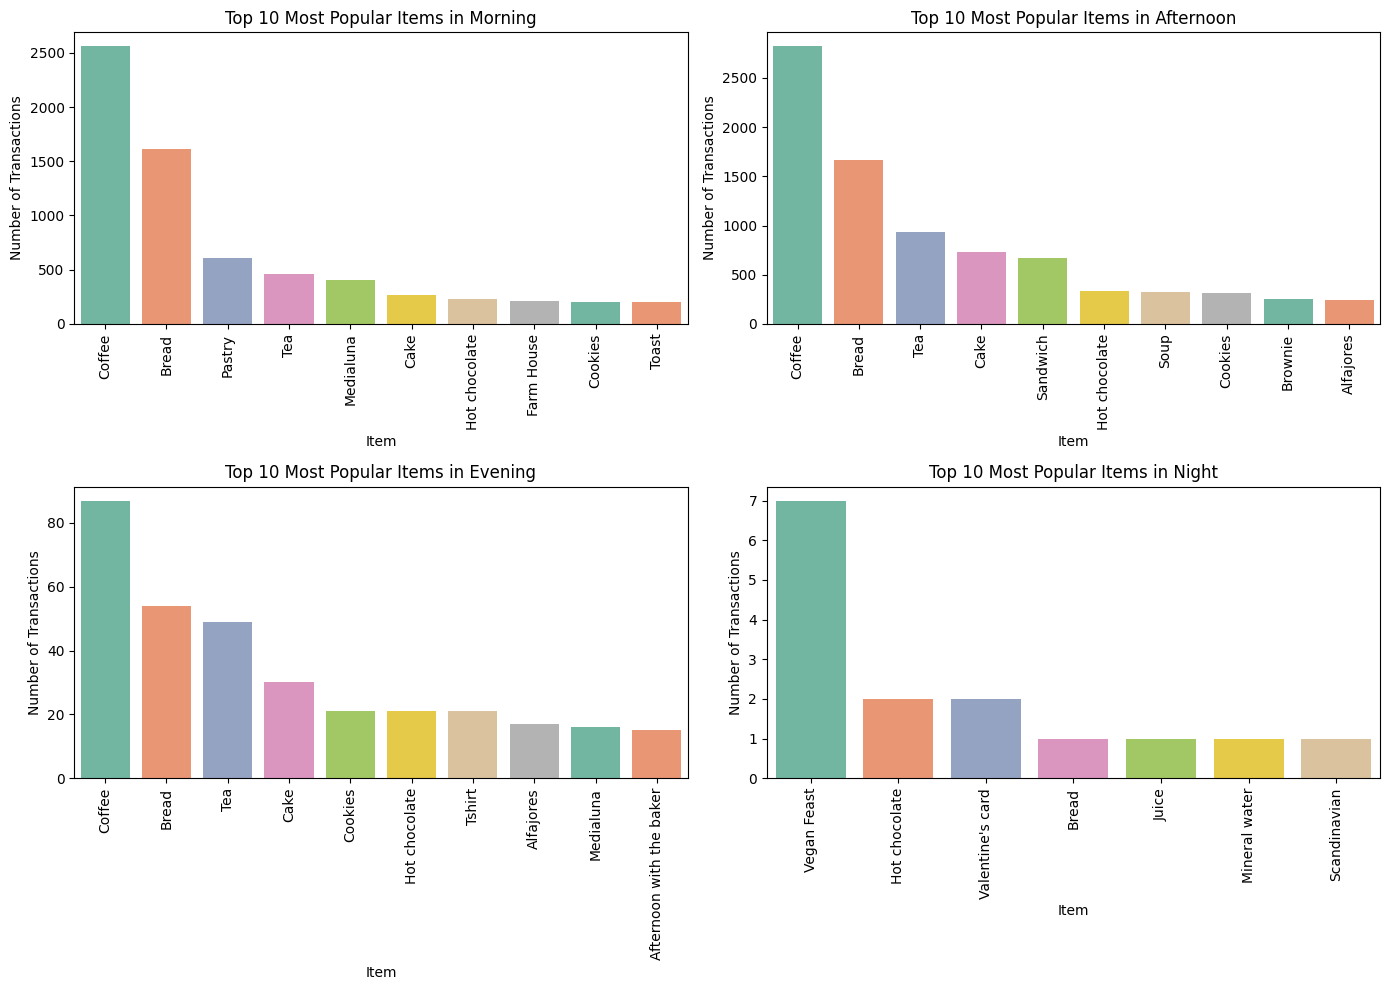

In [31]:
# 20
# Group by period and item, then count the number of transactions for each combination
period_item_counts = df.groupby(['period_day', 'Item']).size().reset_index(name='Transaction Count')

# For each period, get the top 10 most popular items based on transaction count
top_10_period_item_counts = period_item_counts.groupby('period_day', group_keys=False).apply(
    lambda x: x.nlargest(10, 'Transaction Count')
).reset_index(drop=True)

# Plotting for each period (morning, afternoon, evening, night)
periods = ['morning', 'afternoon', 'evening', 'night']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, period in enumerate(periods):
    ax = axes[i // 2, i % 2]  # Choose the subplot for each period
    period_data = top_10_period_item_counts[top_10_period_item_counts['period_day'] == period]
    sns.barplot(x='Item', y='Transaction Count', data=period_data, palette="Set2", ax=ax)
    ax.set_title(f"Top 10 Most Popular Items in {period.capitalize()}")
    ax.set_xlabel("Item")
    ax.set_ylabel("Number of Transactions")
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


21. It turns out that there is something different in the plot above, the insight is that item popularity varies by period, with different preferences for morning, afternoon, and evening.


I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-64-04115aa66da6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = valentine_sales['date_time'].dt.date  # Extract date part from 'date_time'


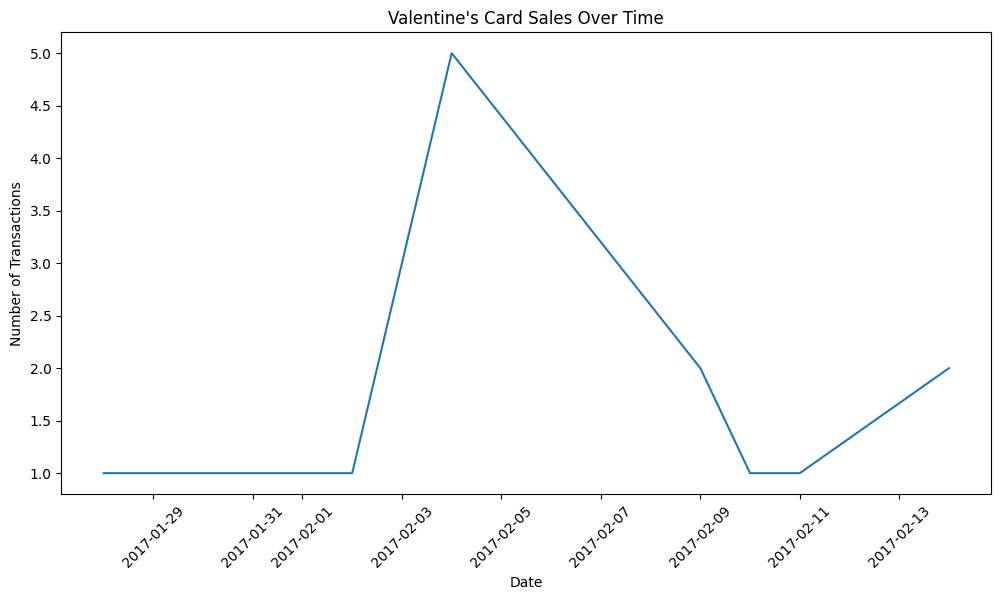

In [64]:
#22
# Assuming df is your DataFrame
# Step 1: Filter for Valentine's card transactions
valentine_sales = df[df['Item'] == "Valentine's card"]

# Step 2: Group by the 'date' column and count the number of transactions
valentine_sales['date'] = valentine_sales['date_time'].dt.date  # Extract date part from 'date_time'
daily_sales_valentine = valentine_sales.groupby('date').size().reset_index(name='transactions')

# Step 3: Convert 'date' column to datetime object
daily_sales_valentine['date'] = pd.to_datetime(daily_sales_valentine['date'])

# Step 4: Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_valentine['date'], daily_sales_valentine['transactions'])
plt.title("Valentine's Card Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

23. I found the insight from the sale of the Valentine's cards above is that sales peaked around Valentine's Day.


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [62]:
# 24
import pandas as pd

# Assuming 'df' is your dataset
# Filter the dataset to select only the relevant items, for example, all the items you want to analyze
items = ['Afternoon with the baker', 'Alfajores', 'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell', 'Bare Popcorn', 'Basket', 'The BART', 'The Nomad', 'Tiffin', 'Toast', 'Truffles', 'Tshirt', "Valentine's card", 'Vegan Feast', 'Vegan mincepie', 'Victorian Sponge']

# Create the binary matrix for the Apriori algorithm
# We will assume the 'Item' column contains the items purchased in each transaction
# and 'Transaction' column represents the transaction identifier

# Initialize the dataframe for one-hot encoding
one_hot_df = pd.DataFrame(0, index=df['Transaction'].unique(), columns=items)

# Loop through the dataframe and set 1 where the item was purchased
for index, row in df.iterrows():
    transaction_id = row['Transaction']
    item = row['Item']
    if item in one_hot_df.columns:
        one_hot_df.at[transaction_id, item] = 1

# The resulting one_hot_df will have transactions as rows and items as columns
# The table will look like the example you provided
one_hot_df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
#25

# Convert quantities to 1 and 0
# Ensure all values in one_hot_df are binary (1 or 0)
one_hot_df = one_hot_df.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows to confirm
one_hot_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-71-1aceb5b0aba3>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  one_hot_df = one_hot_df.applymap(lambda x: 1 if x > 0 else 0)


,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [73]:
# 26
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load your dataset (assuming 'df' is the dataset you provided)
# Example: df = pd.read_csv('your_dataset.csv')

# Step 1: Extract unique items dynamically from the dataset
items = df['Item'].unique()

# Step 2: Create a one-hot encoded matrix
one_hot_df = pd.DataFrame(0, index=df['Transaction'].unique(), columns=items)

for index, row in df.iterrows():
    transaction_id = row['Transaction']
    item = row['Item']
    if item in one_hot_df.columns:
        one_hot_df.at[transaction_id, item] = 1

# Step 3: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.02, use_colnames=True)

# Step 4: Generate association rules (optional, for analysis)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 5: Format the output
# Select only relevant columns for frequent itemsets
output_frequent_itemsets = frequent_itemsets[['support', 'itemsets']]

# Display the frequent itemsets
output_frequent_itemsets



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.327205,(Bread)
1,0.029054,(Scandinavian)
2,0.058320,(Hot chocolate)
3,0.054411,(Cookies)
4,0.038457,(Muffin)
5,0.478394,(Coffee)
6,0.086107,(Pastry)
7,0.061807,(Medialuna)
8,0.142631,(Tea)
9,0.039197,(Farm House)


In [75]:
# 27
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming 'df' is your dataset with 'Transaction' and 'Item' columns
# Replace 'df' with your actual dataset

# Step 1: Extract unique items dynamically from the dataset
items = df['Item'].unique()

# Step 2: Create a one-hot encoded matrix
one_hot_df = pd.DataFrame(0, index=df['Transaction'].unique(), columns=items)

for index, row in df.iterrows():
    transaction_id = row['Transaction']
    item = row['Item']
    if item in one_hot_df.columns:
        one_hot_df.at[transaction_id, item] = 1

# Step 3: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.02, use_colnames=True)

# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 5: Add Zhang's Metric
def zhangs_metric(row):
    numerator = row['support'] - (row['antecedent support'] * row['consequent support'])
    denominator = max(row['support'] * (1 - row['antecedent support']),
                      row['antecedent support'] * (row['consequent support'] - row['support']))
    return numerator / denominator if denominator != 0 else 0

rules['zhangs_metric'] = rules.apply(zhangs_metric, axis=1)

# Step 6: Format and Display Output
output_rules = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support',
                      'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]

# Sort by lift for better insights
output_rules = output_rules.sort_values(by='lift', ascending=False)

# Display the result
output_rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
19,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
17,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
16,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
9,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
8,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
6,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
7,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
11,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428
10,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:

Key findings from the analysis:

Popular Items: Coffee (47.8%), Bread (32.7%), and Tea (14.2%) are most purchased.
Item Combinations: Strong pairings include Cake & Coffee (5.5%) and Tea & Cake (2.4%).
Association Rule: Toast → Coffee shows a strong relationship (Lift: 1.47).
Business Impact: Insights can inform targeted promotions, inventory management, and customer engagement strategies.
